In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
plt.rcParams['figure.figsize'] = (10, 5)

In [75]:
def get_data(path):   
    treelets = pd.read_csv(os.path.join(path, "treelets.csv"))
    pbrt = pd.read_csv(os.path.join(path, "pbrt.csv"))
    
    pbrt = pbrt.drop('workerId', axis=1)
    
    rays = treelets.sort_values('treeletId').groupby('treeletId').agg({'raysDequeued': 'sum'}).raysDequeued.to_numpy()
    pbrt = pbrt.sort_values('treeletId').groupby('treeletId').agg('sum')
    
    return rays, pbrt


def generate_static_assignment(path):   
    rays, pbrt = get_data(path)

    alpha = (100 * (pbrt.nodesVisited) / pbrt.trace / pbrt.nodesTotal).to_numpy()
    alpha = alpha / np.min(alpha)
    
    scores = rays * np.sqrt(alpha)
    
    with open(os.path.join(path, "STATIC0_new"), "w") as fout:
        print(len(scores), file=fout)
        for i in range(len(scores)):
            print(f"{scores[i]:.2f} {1} {i}", file=fout)
            
    return rays, alpha
        
rays, alpha = generate_static_assignment("/data/r2t2/logs/2020-08-14/moana-1_w92_1spp_d5_profile")

In [54]:
rays, pbrt = get_data("/data/r2t2/logs/2020-08-14/moana-1_w92_1spp_d5_profile")

In [60]:
alpha

array([  7.17054601,   1.35798505,   8.22132982,   3.8688968 ,
        30.77027489,   1.13675897,   6.28737556,  10.16074933,
         6.28603088,  24.15778154,  27.00176633,   9.78891296,
        55.30805809,  13.38168479,  45.3904871 ,  11.60592422,
         5.18784184,   3.86505292,  50.79464794,  20.5503096 ,
         3.43987635,   2.13245963,  13.99119483,   5.66667741,
         3.07822306,  45.90499748,  49.17308717,  12.73928435,
         1.61810913,  24.16905277,   1.54641906,  12.32320719,
        13.51600513,  78.63168942,  13.37280552,   8.56886259,
         5.59517263,  17.89314517,   1.        ,   5.42322373,
         7.35247478,  15.64815772,  31.09157033,  19.48324166,
         5.59401375,   1.679426  ,   2.77884156,   1.41991886,
        26.22640646,  69.18399444,  10.82702181,   2.60443284,
         6.53368393,  28.38685847,  47.30059037,  20.89983101,
         7.91472241,   1.90691113,   4.14541591,   3.72836021,
        23.31039502,  37.09632058,  54.38771794,  86.37

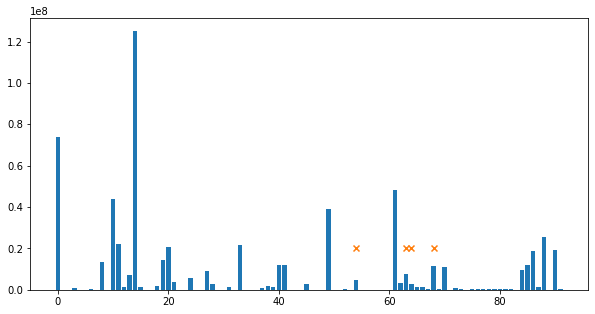

In [87]:
#N = sorted([10, 18, 19, 14, 54, 49, 33, 61, 62, 63, 64, 68, 70])
N = sorted([68, 64, 63, 54])
plt.bar(list(range(92)), rays * alpha)
plt.scatter(N, [0.2e8] * len(N), marker='x')

In [51]:
np.argsort(alpha)

array([38,  5,  1, 47, 30, 28, 45, 57, 21, 51, 46, 24, 20, 59, 17,  3, 58,
       84, 16, 39, 44, 36, 23, 83,  8,  6, 52,  0, 40, 56,  2, 35, 11,  7,
       50, 72, 15, 31, 27, 71, 34, 13, 32, 22, 41, 37, 86, 43, 19, 55, 89,
       85, 60,  9, 29, 48, 10, 53,  4, 42, 70, 91, 61, 79, 74, 14, 25, 54,
       26, 18, 62, 12, 67, 49, 69, 82, 76, 33, 63, 90, 73, 64, 87, 88, 80,
       78, 75, 65, 81, 68, 77, 66])